In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization ###
#from sklearn.tree import export_graphviz
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
from sklearn.ensemble import RandomForestClassifier
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import linear_model
from sklearn.svm import SVC

from sklearn.metrics import RocCurveDisplay

# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.manifold import TSNE

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
features = list()
with open('../features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
#X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
#                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = X_train
#train['Activity'] = y_train

In [5]:
#X_train

In [6]:
X_test = pd.read_csv('../test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
#X_test['subject'] = pd.read_csv('../test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv('../test/y_test.txt', names=['Activity'], squeeze=True)
#y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
#                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#test = X_test
#test['Activity'] = y_test

In [7]:
#X_train.drop(['Activity'], axis=1)

In [8]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                            )

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
attributes = [col for col in X_train.columns]

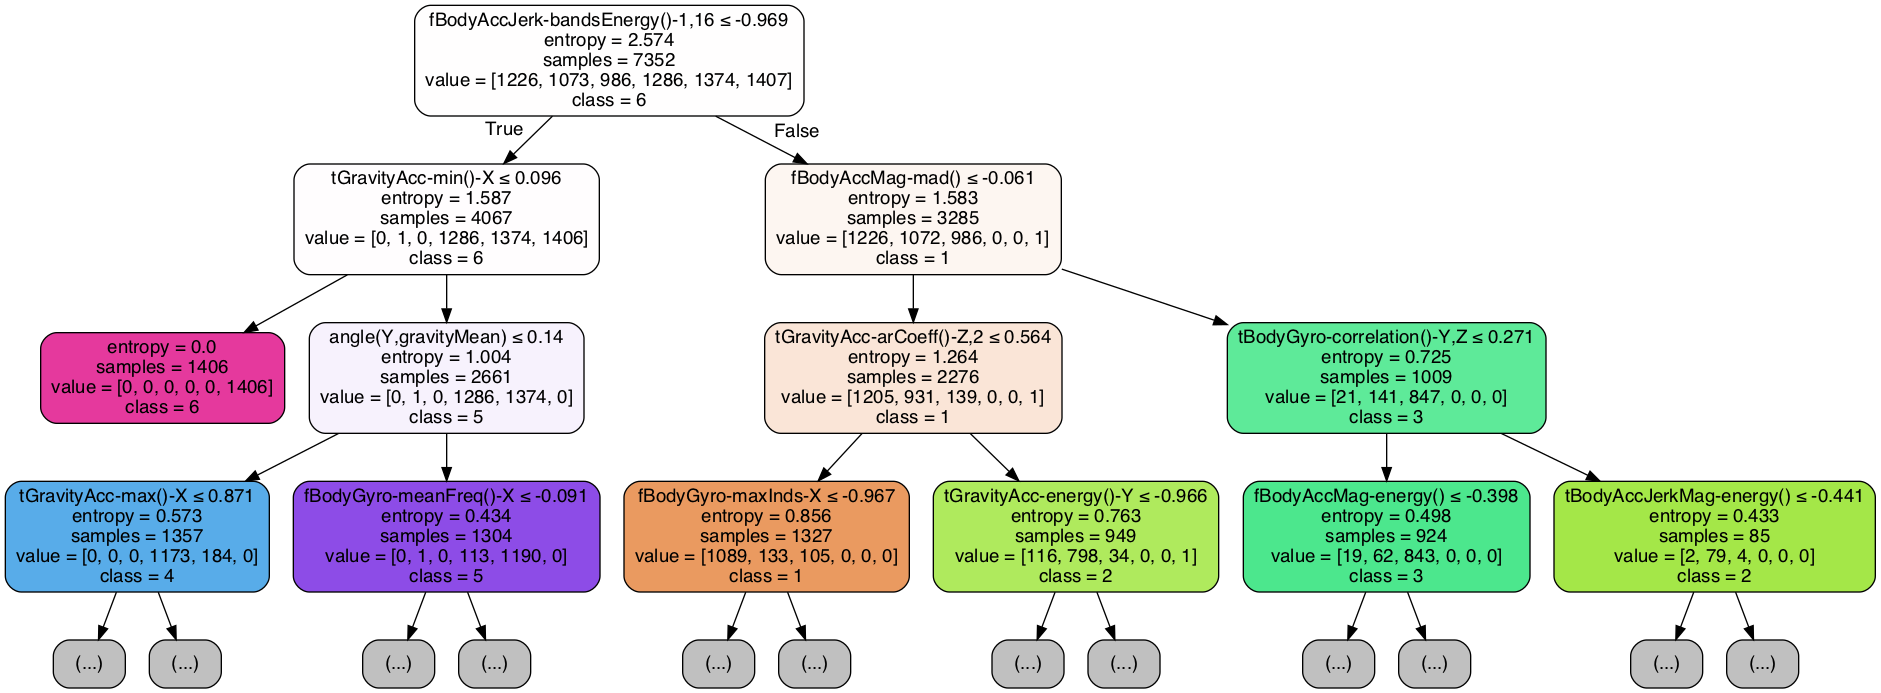

In [10]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Best params

In [11]:
#param_list = {'max_depth': [None],
#             'min_samples_split': np.arange(2, 100, 5).tolist(),
#             'min_samples_leaf': np.arange(1, 100, 5).tolist()
#             }

#grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
#grid_search.fit(X_train, y_train)

#res = grid_search.cv_results_

In [12]:
#grid_search.best_estimator_

In [13]:
#grid_search.best_params_

In [14]:
#def report(results, n_top=3):
#    for i in range(1, n_top + 1):
#        candidates = np.flatnonzero(results['rank_test_score'] == i)
#        for candidate in candidates:
#            print("Model with rank: {0}".format(i))
#            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                  results['mean_test_score'][candidate],
#                  results['std_test_score'][candidate]))
#            print("Parameters: {0}".format(results['params'][candidate]))
#            print("")

In [15]:
#report(res, n_top=3)

## Eval

In [16]:
#clrf = RandomForestClassifier()
#clrf.fit(X_train, y_train)

In [17]:
#clrf.score(X_test, y_test)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print('Accuracy', accuracy_score(y_test, y_pred))
print('F1', f1_score(y_test, y_pred, average=None))

Accuracy 0.8585001696640652
F1 [0.86939943 0.79411765 0.83709869 0.80042239 0.82802548 1.        ]


In [20]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           1       0.82      0.92      0.87       496
           2       0.85      0.75      0.79       471
           3       0.84      0.84      0.84       420
           4       0.83      0.77      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.85      0.85      2947
weighted avg       0.86      0.86      0.86      2947



In [21]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[458,  25,  13,   0,   0,   0],
       [ 77, 348,  46,   0,   0,   0],
       [ 19,  48, 353,   0,   0,   0],
       [  0,   1,   0, 385, 105,   0],
       [  0,   0,   0,  76, 456,   0],
       [  0,   0,   0,   0,   0, 537]])

In [22]:
y_score = clf.predict_proba(X_test)

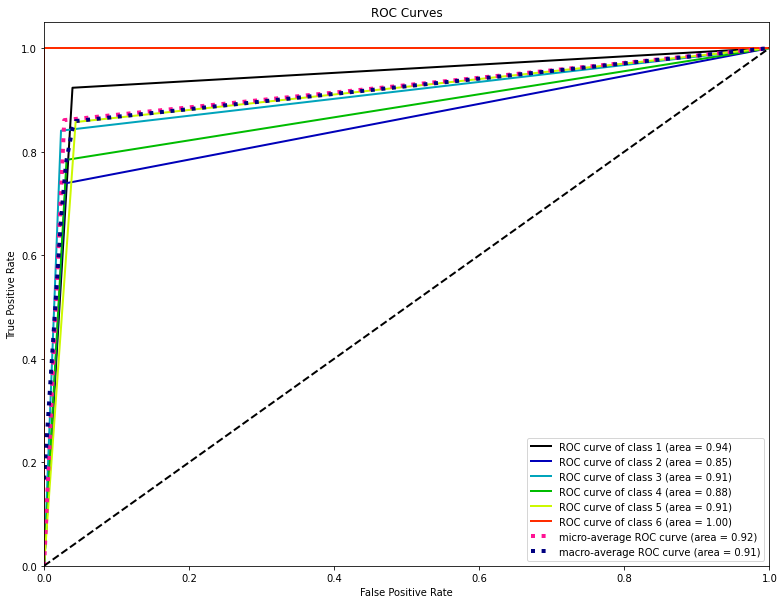

In [23]:
plot_roc(y_test, y_score, figsize=(13,10))
plt.show()

## k-NN

In [24]:
#knn = KNeighborsClassifier()
#from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
#grid_search=grid.fit(X_train, y_train)

In [25]:
#print(grid_search.best_params_)

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
y_pred_KNN = knn.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           1       0.84      0.97      0.90       496
           2       0.90      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.80      0.85       491
           5       0.84      0.93      0.89       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



In [29]:
y_score = knn.predict_proba(X_test)

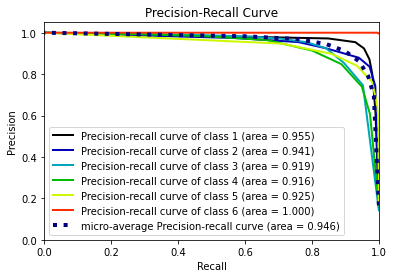

In [30]:
plot_precision_recall(y_test, y_score)
plt.show()

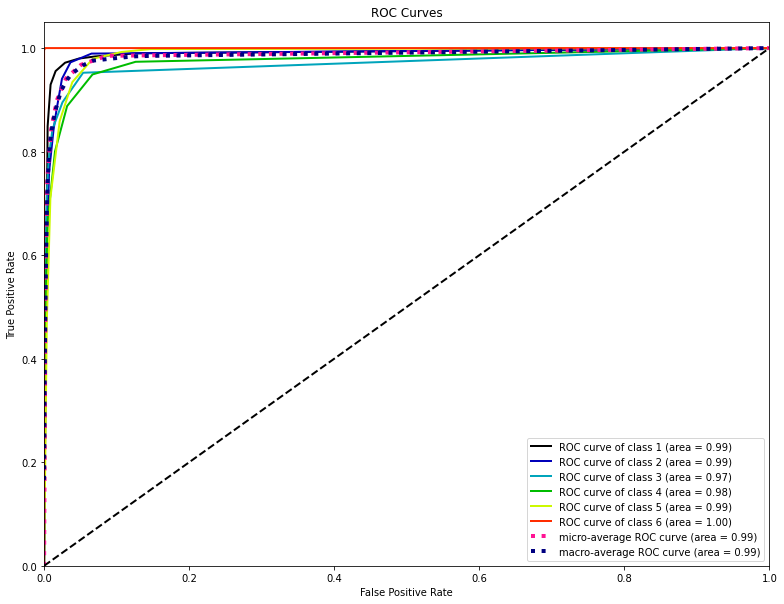

In [31]:
plot_roc(y_test, y_score, figsize=(13,10))
plt.show()